<a href="https://colab.research.google.com/github/mammadmaheri7/AcharFaranceProject/blob/master/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading tensorflow and keras and other appropriate libraries:


In [0]:
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

Loading Cifar-10 dataset from keras datasets and separate test and train datas:

In [0]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


Define the class names of the dataset labels:

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Plot the first 20 images along with their labels:

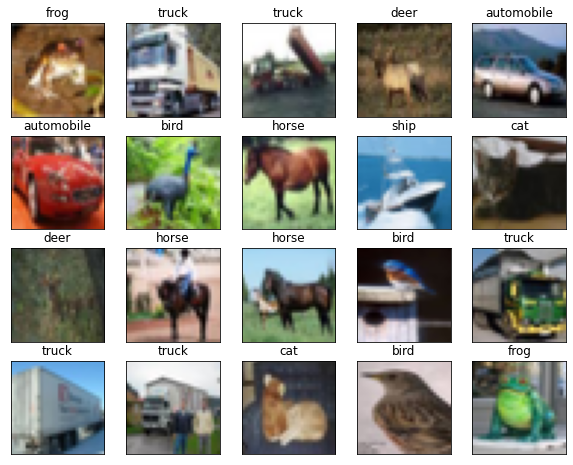

In [0]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[(train_labels[i][0])])
    plt.xticks([])
    plt.yticks([])
plt.show()

Printing the shape of the train and test images:

In [0]:
print(train_images.shape)
print(test_images.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


TypeError: ignored

Plot an image figure of the train images for better illustration:

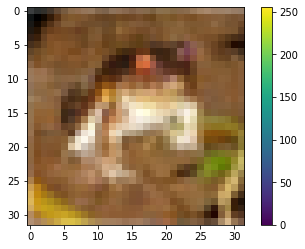

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Scaling the images of the dataset to a range of 0 to 1:

In [0]:
train_images = train_images/255
test_images = test_images / 255

Importing appropriate tools for modeling our neural network:

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras import regularizers

Modeling a convolutional neural network:

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

Compile the model:

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Early stopping callback:

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

Training the model by fitting it to the train data:

In [23]:
history = model.fit(train_images,train_labels,epochs=20,validation_split=0.2,callbacks = early_stop)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4938 - accuracy: 0.4537 - val_loss: 1.1181 - val_accuracy: 0.6053
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9994 - accuracy: 0.6455 - val_loss: 0.9108 - val_accuracy: 0.6809
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8078 - accuracy: 0.7208 - val_loss: 0.8107 - val_accuracy: 0.7230
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6735 - accuracy: 0.7652 - val_loss: 0.7689 - val_accuracy: 0.7416
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5744 - accuracy: 0.8008 - val_loss: 0.7240 - val_accuracy: 0.7615
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4768 - accuracy: 0.8320 - val_loss: 0.7380 - val_accuracy: 0.7575
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4058 - accuracy: 0.8576 - val_loss: 0.7474 - val_accuracy:

Evaluate the model with the test data:

In [24]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3070 - accuracy: 0.7353


Loss plot:

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy plot:

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Extracting classification report:

In [0]:
from sklearn.metrics import classification_report

Now test your neural network by yourself: